<a href="https://colab.research.google.com/github/1X-HE/OKOKqm2/blob/main/barchart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This page shows the code of cleaning data, sortinf data and generating the barchart.

,borough,population,listings_total,listings_active,crimes_12m_total,airbnb_density_per_10k,crime_rate_per_1k,airbnb_density_per_1k
0,Camden,216943.0,4707,2902,41839.0,133.767856,192.857110,13.376786
1,City of London,15111.0,424,305,NaN,201.839719,NaN,20.183972
2,Hackney,266758.0,5168,2148,33109.0,80.522421,124.116240,8.052242
3,Hammersmith and Fulham,188687.0,2996,1667,21704.0,88.347369,115.026472,8.834737
4,Haringey,263850.0,1898,905,29064.0,34.299792,110.153496,3.429979


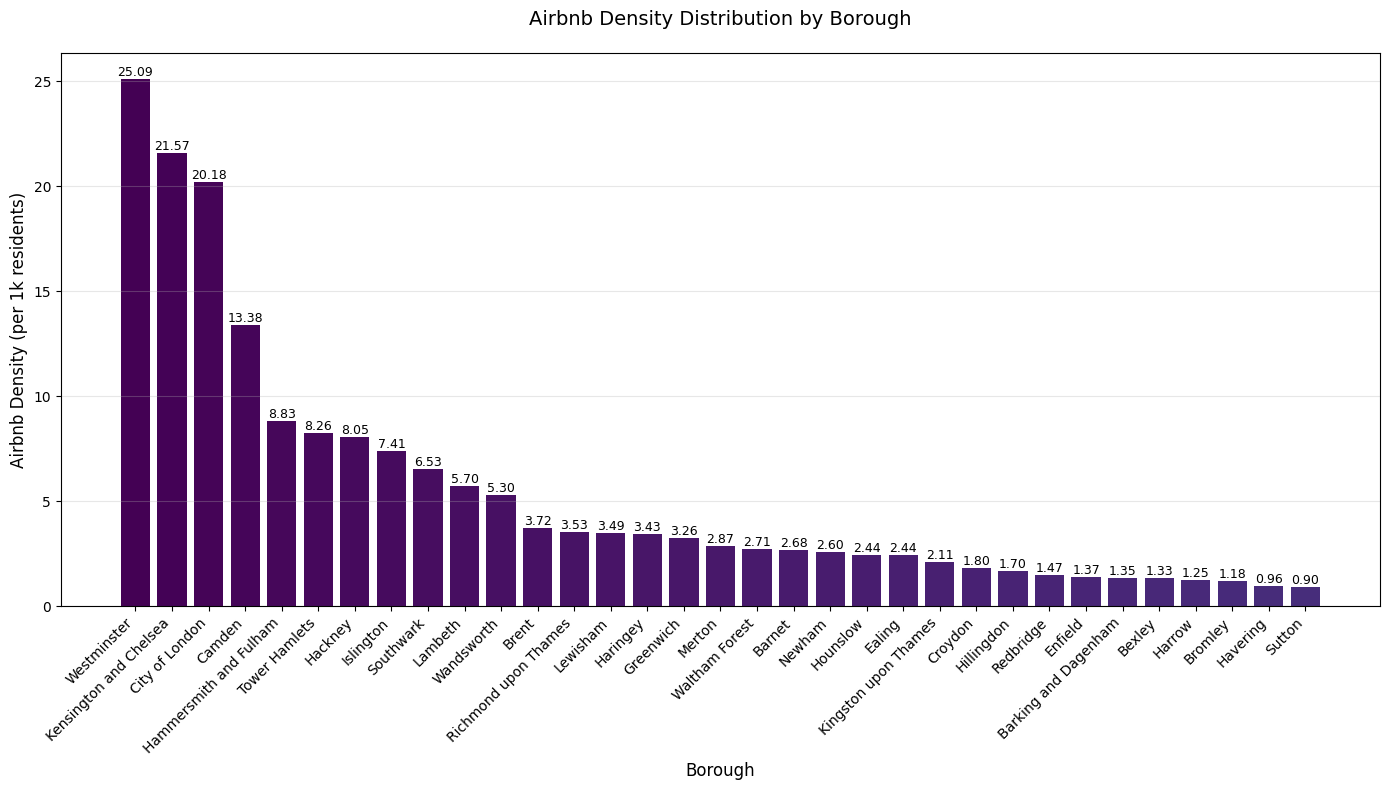

Chart successfully generated and saved as airbnb_density_by_area.png


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'borough_metrics_ons2024_per1k.csv'
df = pd.read_csv(file_name)


display(df.head())

try:
    df = pd.read_csv(file_path)

    # Check if required columns exist
    required_columns = ['borough', 'airbnb_density_per_1k']
    if not all(col in df.columns for col in required_columns):
        missing_cols = [col for col in required_columns if col not in df.columns]
        raise ValueError(f"Required columns missing in CSV file: {missing_cols}")

    # Create figure
    plt.figure(figsize=(14, 8))

    # Sort by Airbnb density in descending order
    df_sorted = df.sort_values('airbnb_density_per_1k', ascending=False)

    # Plot bar chart
    bars = plt.bar(df_sorted['borough'], df_sorted['airbnb_density_per_1k'],
                   color=plt.cm.viridis(range(len(df_sorted))))

    # Set chart labels and title
    plt.xlabel('Borough', fontsize=12)
    plt.ylabel('Airbnb Density (per 1k residents)', fontsize=12)
    plt.title('Airbnb Density Distribution by Borough', fontsize=14, pad=20)

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom', fontsize=9)
       # Add grid lines
    plt.grid(axis='y', alpha=0.3)

    # Adjust layout
    plt.tight_layout()

    # Save chart
    plt.savefig('airbnb_density_by_area.png', dpi=300, bbox_inches='tight')

    # Display chart
    plt.show()

    print("Chart successfully generated and saved as airbnb_density_by_area.png")

except FileNotFoundError:
    print(f"Error: File {file_path} not found, please ensure it's in the current directory")
except pd.errors.EmptyDataError:
    print("Error: CSV file is empty or incorrectly formatted")
except Exception as e:
    print(f"Error occurred while processing data: {str(e)}")

